In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report


In [2]:
def load_and_preprocess(dataset):
    (X_train, y_train), (X_test, y_test) = dataset.load_data()

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return X_train, X_test, y_train, y_test


In [3]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [4]:
X_train, X_test, y_train, y_test = load_and_preprocess(mnist)

model_mnist = create_cnn_model()
history_mnist = model_mnist.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 110ms/step - accuracy: 0.8312 - loss: 0.5621 - val_accuracy: 0.9828 - val_loss: 0.0604
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9750 - loss: 0.0802 - val_accuracy: 0.9878 - val_loss: 0.0419
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.9834 - loss: 0.0563 - val_accuracy: 0.9890 - val_loss: 0.0371
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 106ms/step - accuracy: 0.9862 - loss: 0.0459 - val_accuracy: 0.9895 - val_loss: 0.0371
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.9885 - loss: 0.0348 - val_accuracy: 0.9893 - val_loss: 0.0371
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9908 - val_loss: 0.0353
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 104ms/step - accuracy: 0.9911 - loss: 0.0254 - val_accuracy: 0.9923 - val_loss: 0.0311
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 106ms/step - accuracy: 0.9929 - loss: 0

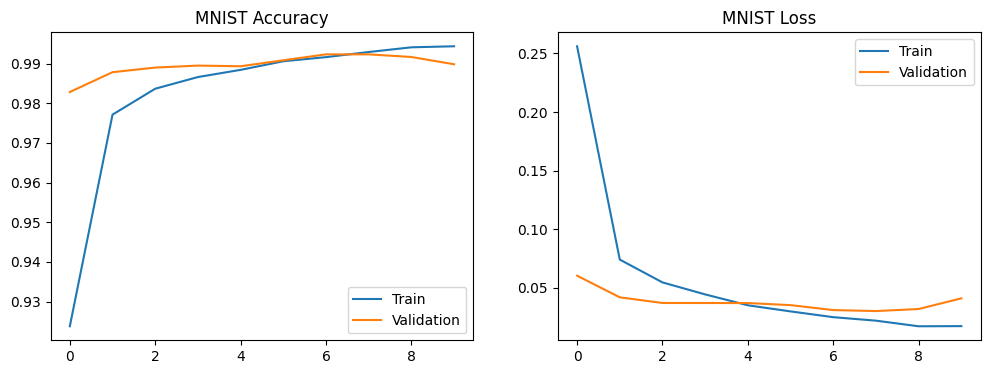

In [5]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_mnist.history['accuracy'], label='Train')
plt.plot(history_mnist.history['val_accuracy'], label='Validation')
plt.title('MNIST Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_mnist.history['loss'], label='Train')
plt.plot(history_mnist.history['val_loss'], label='Validation')
plt.title('MNIST Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


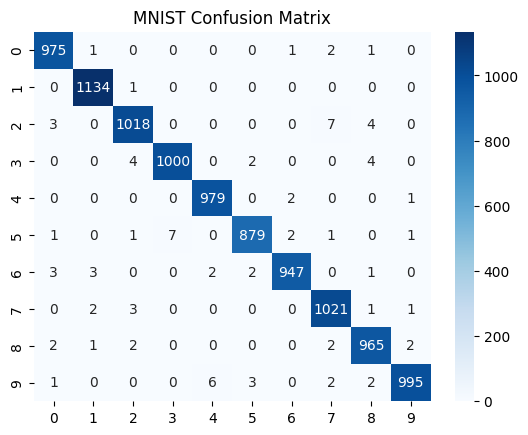

Classification Report (MNIST):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [6]:
y_pred = model_mnist.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('MNIST Confusion Matrix')
plt.show()

print("Classification Report (MNIST):")
print(classification_report(y_true, y_pred_classes))


In [ ]:
# fashion mnist

In [7]:
X_train, X_test, y_train, y_test = load_and_preprocess(fashion_mnist)

model_fashion = create_cnn_model()
history_fashion = model_fashion.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 105ms/step - accuracy: 0.6883 - loss: 0.8820 - val_accuracy: 0.8545 - val_loss: 0.3952
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 108ms/step - accuracy: 0.8526 - loss: 0.4129 - val_accuracy: 0.8768 - val_loss: 0.3452
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 106ms/step - accuracy: 0.8747 - loss: 0.3440 - val_accuracy: 0.8853 - val_loss: 0.3083
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.8829 - loss: 0.3233 - val_accuracy: 0.8890 - val_loss: 0.2985
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 104ms/step - accuracy: 0.8907 - loss: 0.2957 - val_accuracy: 0.8942 - val_loss: 0.2874
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.8998 - loss: 0.2757 - val_accuracy: 0.8992 - val_loss: 0.2714
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.9080 - loss: 0.2538 - val_accuracy: 0.9070 - val_loss: 0.2509
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 104ms/step - accuracy: 0.9117 - loss: 0

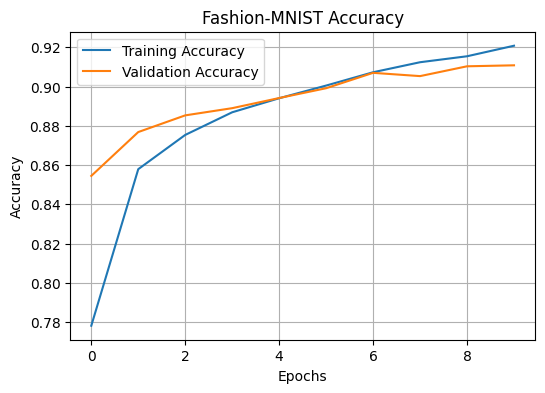

In [10]:
plt.figure(figsize=(6,4))

plt.plot(history_fashion.history['accuracy'], label='Training Accuracy')
plt.plot(history_fashion.history['val_accuracy'], label='Validation Accuracy')

plt.title('Fashion-MNIST Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()


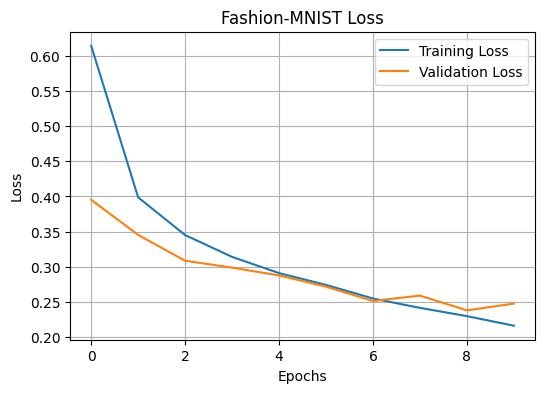

In [11]:
plt.figure(figsize=(6,4))

plt.plot(history_fashion.history['loss'], label='Training Loss')
plt.plot(history_fashion.history['val_loss'], label='Validation Loss')

plt.title('Fashion-MNIST Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


In [12]:
class_names = [
    'T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
]


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


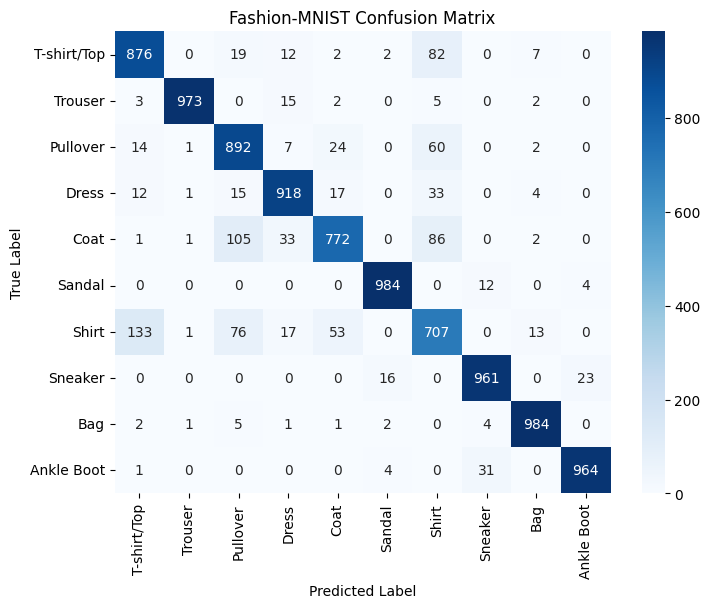

In [13]:
y_pred = model_fashion.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)

plt.title('Fashion-MNIST Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


In [14]:
print("Classification Report for Fashion-MNIST:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Classification Report for Fashion-MNIST:

              precision    recall  f1-score   support

 T-shirt/Top       0.84      0.88      0.86      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.89      0.84      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.89      0.77      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.73      0.71      0.72      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle Boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



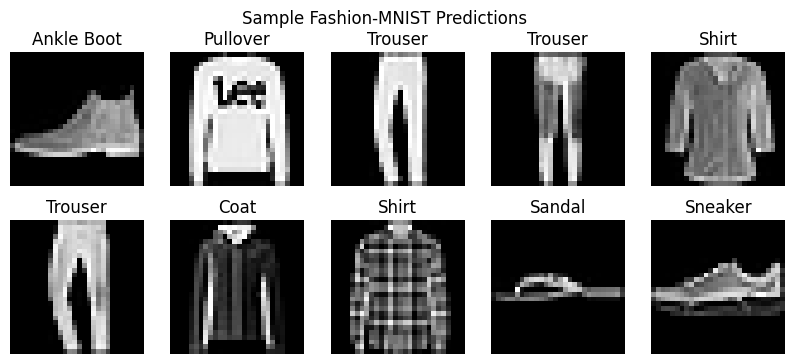

In [15]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_pred_classes[i]])
    plt.axis('off')

plt.suptitle("Sample Fashion-MNIST Predictions")
plt.show()
